# Social_Network_Ads using Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the data
data = pd.read_csv("Dataset\Social_Network_Ads.csv")

In [3]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
data.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [5]:
data.shape

(400, 5)

In [6]:
data.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
data.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [8]:
data["Gender"].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [10]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


<Axes: xlabel='Gender', ylabel='EstimatedSalary'>

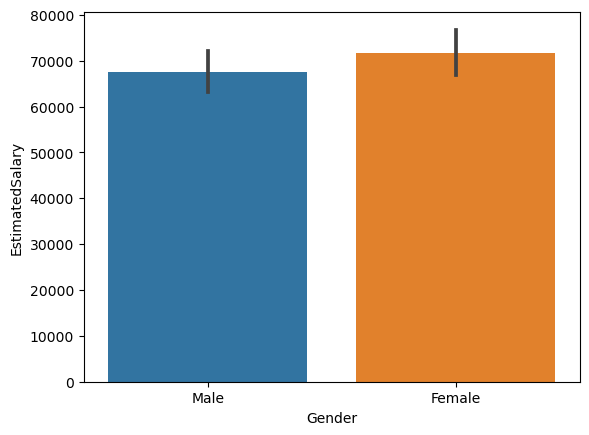

In [11]:
# data visualization

sns.barplot(data=data,x="Gender",y="EstimatedSalary")

<Axes: xlabel='Gender', ylabel='Purchased'>

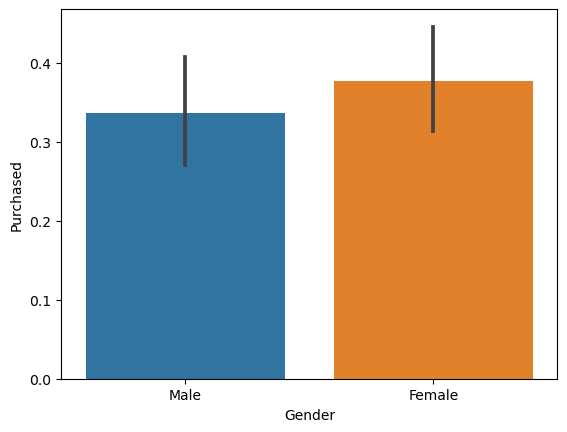

In [12]:
sns.barplot(data=data,x="Gender",y="Purchased")

<Axes: xlabel='Gender', ylabel='Age'>

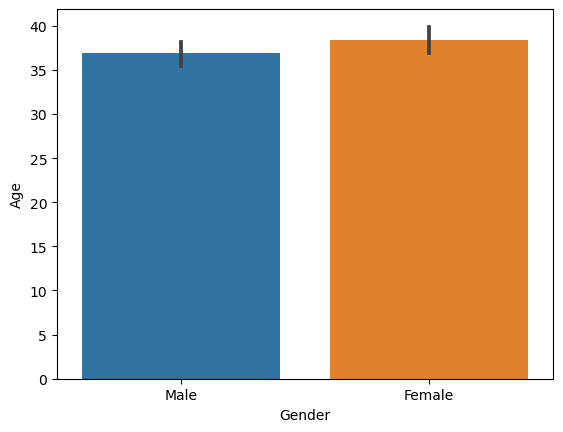

In [13]:
sns.barplot(data=data,x="Gender",y="Age")

<Axes: xlabel='Gender', ylabel='Age'>

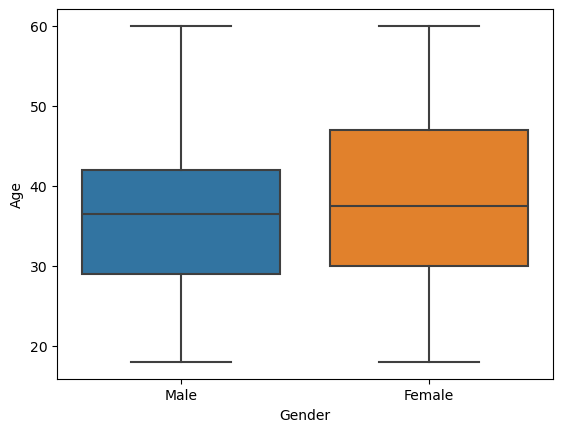

In [15]:
sns.boxplot(data,x="Gender",y="Age")

<Axes: xlabel='Gender', ylabel='Purchased'>

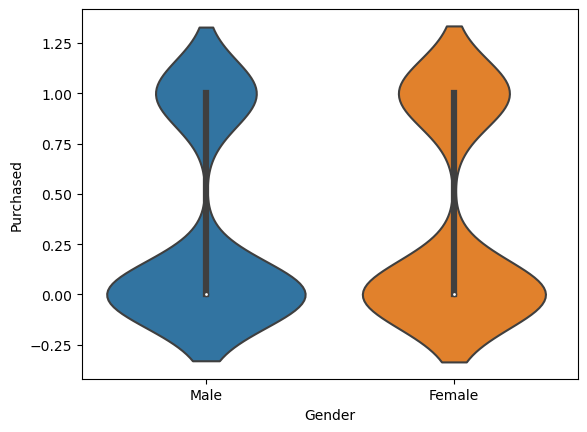

In [16]:
sns.violinplot(data,x="Gender",y="Purchased")

In [17]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


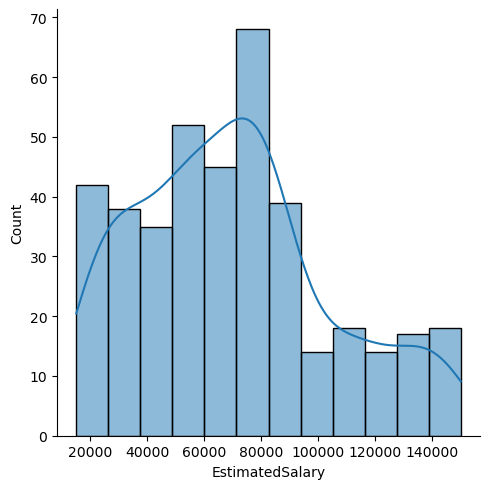

In [23]:
sns.displot(data,x="EstimatedSalary",kde=True)

In [24]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [33]:
data["Gender_C"]= le.fit_transform(data["Gender"])
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Gender_C
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1


In [34]:
data.drop("Gender", axis=1,inplace=True)

In [35]:
data.head()

,User ID,Age,EstimatedSalary,Purchased,Gender_C
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1


In [36]:
# dividing into dependent and indepentent variables
x = data.drop("Purchased", axis = 1)

In [37]:
x.head()

,User ID,Age,EstimatedSalary,Gender_C
0,15624510,19,19000,1
1,15810944,35,20000,1
2,15668575,26,43000,0
3,15603246,27,57000,0
4,15804002,19,76000,1


In [39]:
y = data["Purchased"]

In [40]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [67]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state=0)

In [68]:
x_train.shape

(320, 4)

In [69]:
x_test.shape

(80, 4)

In [70]:
y_train.shape

(320,)

In [71]:
y_test.shape

(80,)

In [72]:
#model building
from sklearn.linear_model import LogisticRegression

In [73]:
model = LogisticRegression()

In [74]:
model

LogisticRegression()

In [75]:
model.fit(x_train,y_train)
model

LogisticRegression()

In [76]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [77]:

from sklearn.metrics import accuracy_score

In [78]:
score = accuracy_score(y_pred,y_test)
score

0.825

In [79]:
from sklearn.metrics import confusion_matrix

In [80]:
cn = confusion_matrix(y_pred,y_test)
cn

array([[56, 12],
       [ 2, 10]], dtype=int64)

In [81]:
from sklearn.metrics import classification_report

In [82]:
clf = classification_report(y_pred,y_test)

In [83]:
print(clf)

              precision    recall  f1-score   support

           0       0.97      0.82      0.89        68
           1       0.45      0.83      0.59        12

    accuracy                           0.82        80
   macro avg       0.71      0.83      0.74        80
weighted avg       0.89      0.82      0.84        80



In [85]:
# linear regression

from sklearn.linear_model import LinearRegression

In [86]:
ln = LinearRegression()

In [87]:
ln.fit(x_train,y_train)

LinearRegression()

In [88]:
ln_y_pred = ln.predict(x_test)
ln_y_pred

array([ 0.22344052,  0.30461738,  0.29602087,  0.195126  ,  0.22990978,
       -0.13199155, -0.00461925,  0.60913368, -0.14385071,  0.50988301,
        0.08200402,  0.03828935,  0.27024252,  0.44422784, -0.04236798,
        0.38545923,  0.35849632, -0.08369621,  1.05507832,  0.10215531,
        0.22353931,  0.885951  ,  0.38108705,  0.73155884, -0.16114943,
        0.92441681,  0.18811886,  0.17558823,  0.32964197,  0.30300205,
        0.02117823,  0.38943604,  0.79812423,  0.29090075, -0.04310521,
       -0.22673941,  0.00127591,  0.18739597,  0.0576121 ,  0.54483682,
        0.14228174,  0.38040762,  0.16363244,  0.07502749,  0.66557994,
        0.05149858,  0.36923448,  0.80357679, -0.10911261,  0.73081454,
        1.05264517,  0.10942309,  0.2706367 ,  0.46501231,  1.00282428,
        0.39283137,  0.18370879,  0.12735288,  0.47092486, -0.20234008,
        0.03083554,  0.8096761 , -0.11807388,  0.42998934, -0.28113822,
        0.97276268,  0.07780743,  0.03229757,  0.34807755,  0.47

In [90]:
score_ln = accuracy_score(y_test, ln_y_pred.round(), normalize=False)

In [91]:
score_ln

74

In [92]:
ln_y_pred.round()

array([ 0.,  0.,  0.,  0.,  0., -0., -0.,  1., -0.,  1.,  0.,  0.,  0.,
        0., -0.,  0.,  0., -0.,  1.,  0.,  0.,  1.,  0.,  1., -0.,  1.,
        0.,  0.,  0.,  0.,  0.,  0.,  1.,  0., -0., -0.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1., -0.,  1.,  1.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  0., -0.,  0.,  1., -0.,  0., -0.,
        1.,  0.,  0.,  0.,  0.,  1.,  0., -0.,  0.,  0., -0.,  0.,  0.,
        1.,  1.])

<Axes: ylabel='Purchased'>

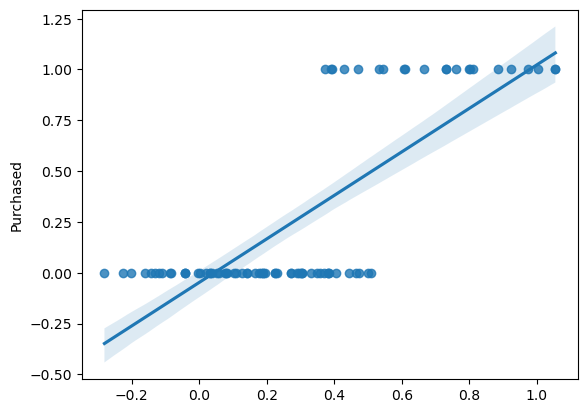

In [95]:
sns.regplot(data=data, x = ln_y_pred, y = y_test)